<a href="https://colab.research.google.com/github/Ujjwal-hub10/AI-and-ML/blob/main/UjjwalBhardwajSingh_2358126_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
train_dir = "/content/drive/MyDrive/AI and ML/Week5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/AI and ML/Week5/FruitinAmazon/test"

In [ ]:
class_names = os.listdir(train_dir)
print(f"Classes: {class_names}")

Classes: ['acai', 'guarana', 'cupuacu', 'graviola', 'pupunha', 'tucuma']


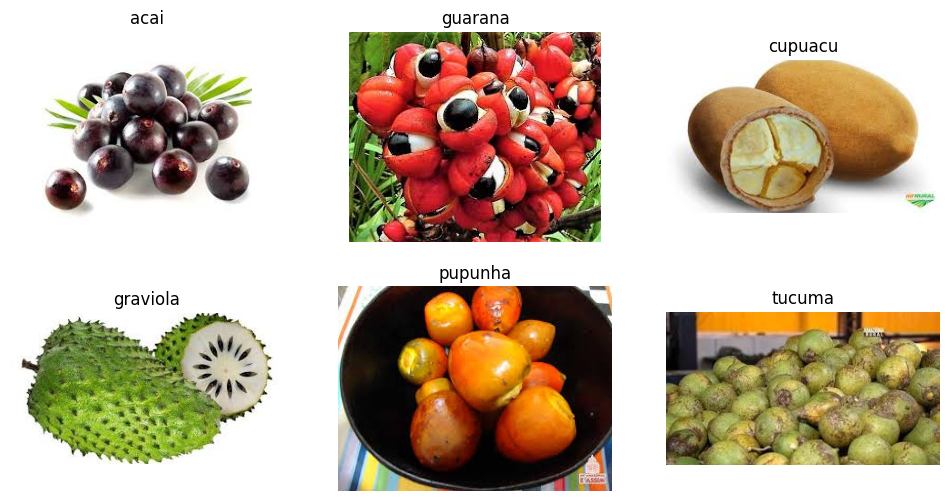

In [ ]:
def visualize_images(train_dir, class_names):
    fig, axes = plt.subplots(2, len(class_names) // 2, figsize=(12, 6))
    axes = axes.flatten()
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(train_dir, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")
    plt.show()

visualize_images(train_dir, class_names)

In [ ]:
damagedImages = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path)  # Try opening the image
        except (IOError, SyntaxError):
            damagedImages.append(img_path)
            os.remove(img_path)
            print(f"Damaged image removed: {img_path}")

if not damagedImages:
    print("No Damaged Images Found.")


No Damaged Images Found.


In [ ]:
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
rescale = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [ ]:

num_classes = len(class_names)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.1100 - loss: 2.0855

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1102 - loss: 2.1189 - val_accuracy: 0.0000e+00 - val_loss: 2.2293
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.1892 - loss: 1.7179

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 539ms/step - accuracy: 0.1940 - loss: 1.7259 - val_accuracy: 0.1111 - val_loss: 1.7318
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.3131 - loss: 1.5919

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.3251 - loss: 1.5841 - val_accuracy: 0.7778 - val_loss: 1.3678
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4774 - loss: 1.4331 - val_accuracy: 0.7778 - val_loss: 1.2580
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6584 - loss: 1.1729 - val_accuracy: 0.3889 - val_loss: 1.0237
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 484ms/step - accuracy: 0.5994 - loss: 1.0650 - val_accuracy: 0.6111 - val_loss: 1.1810
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.8099 - loss: 0.8234 - val_accuracy: 0.5556 - val_loss: 1.5543
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8287 - loss: 0.7293

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 578ms/step - accuracy: 0.8368 - loss: 0.7200 - val_accuracy: 0.9444 - val_loss: 0.7800
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 957ms/step - accuracy: 0.9093 - loss: 0.5050 - val_accuracy: 0.7778 - val_loss: 0.6823
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.9301 - loss: 0.3593 - val_accuracy: 0.5556 - val_loss: 0.9516
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 545ms/step - accuracy: 0.9154 - loss: 0.3340 - val_accuracy: 0.7778 - val_loss: 0.8022
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.9705 - loss: 0.2245 - val_accuracy: 0.8333 - val_loss: 0.6233
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 0.9891 - loss: 0.1917 - val_accuracy: 0.8333 - val_loss: 0.5425
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 806ms/step - accuracy: 1.0000 - loss: 0.0814 - val_accuracy: 0.8333 - val_loss: 0.4665
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 1.0000 - loss: 0.0712 - val_accuracy: 0.8333 - val_los

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7667 - loss: 0.7916
Test Accuracy: 76.67%


In [ ]:

model.save("final_model.h5")
loaded_model = tf.keras.models.load_model("final_model.h5")

In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = loaded_model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
              precision    recall  f1-score   support

        acai       0.62      1.00      0.77         5
     guarana       0.67      0.80      0.73         5
     cupuacu       0.83      1.00      0.91         5
    graviola       0.80      0.80      0.80         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.82      0.77      0.75        30
weighted avg       0.82      0.77      0.75        30



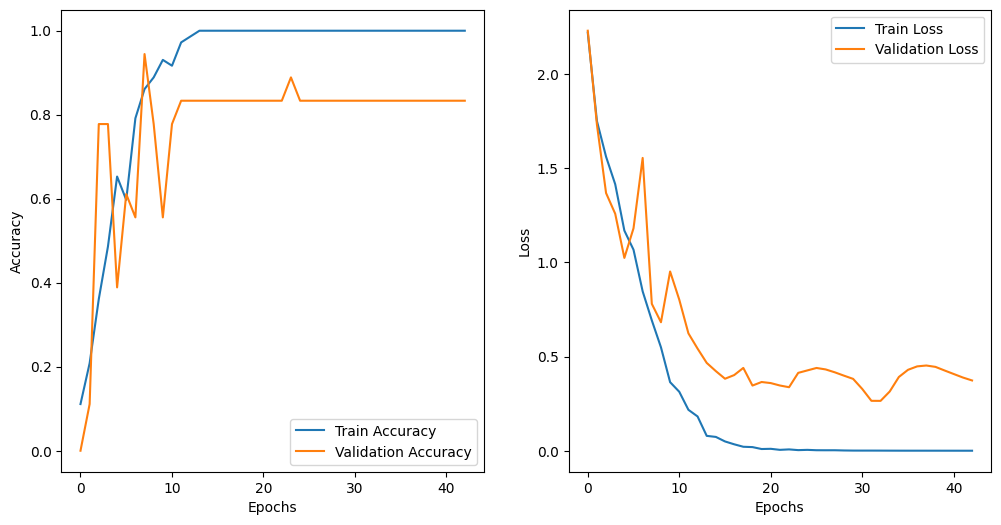

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()